In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
uploaded=files.upload()

Saving fall.csv to fall.csv


In [4]:
import io
df=pd.read_csv(io.BytesIO(uploaded['fall.csv']))

In [5]:
df.head()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,2,13,21,13,60,1009,3,5,0.0
1,2011,2,14,21,18,75,1009,3,5,0.0
2,2011,2,15,22,18,75,1010,3,10,0.0
3,2011,2,16,23,21,86,1011,3,8,0.0
4,2011,2,17,23,19,75,1011,3,8,0.0


In [6]:
df.tail()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
2357,2017,12,27,23,17,71,1013,4,8,0.0
2358,2017,12,28,22,16,68,1013,4,2,0.0
2359,2017,12,29,23,16,66,1014,4,5,0.0
2360,2017,12,30,23,17,62,1013,4,5,0.0
2361,2017,12,31,24,18,68,1012,4,2,0.0


In [7]:
df.isnull().sum()

year             0
month            0
day              0
tempavg          0
DPavg            0
humidity avg     0
SLPavg           0
visibilityavg    0
windavg          0
Rainfall         0
dtype: int64

In [8]:
x=df.iloc[:,:7].values
y=df.iloc[:,7].values


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.40,random_state=0)

In [41]:
x_train

array([[2017,    9,    4, ...,   26,   79, 1005],
       [2016,    9,    1, ...,   26,   89, 1005],
       [2016,    6,   22, ...,   26,   72, 1005],
       ...,
       [2013,    8,   16, ...,   26,   86, 1003],
       [2013,   10,   27, ...,   22,   93, 1007],
       [2016,    1,   23, ...,   14,   73, 1017]])

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm=LinearRegression()

In [44]:
lm.fit(x_train,y_train)

LinearRegression()

In [45]:
lm.coef_

array([-0.09040698,  0.02308844, -0.0034898 ,  0.01511225,  0.17921475,
       -0.05821404, -0.05168779])

In [46]:
lm.predict(x_test)

array([4.5914888 , 3.02673381, 3.39596588, 3.32120273, 4.33860448,
       3.44239562, 2.87040312, 4.30307023, 4.98251596, 5.28265159,
       4.55236927, 4.63752045, 4.29690578, 4.09656051, 4.95645741,
       3.56451352, 4.52271525, 3.89270598, 5.19306381, 4.36040748,
       3.07713514, 4.51361697, 4.84497111, 3.85960745, 4.9663238 ,
       2.49637989, 3.48411265, 3.40305809, 5.4317823 , 4.33268029,
       3.08363981, 4.33659016, 3.9931892 , 5.29301475, 4.3809091 ,
       3.04846405, 5.15441577, 3.7025834 , 5.16990094, 3.94416955,
       4.92952262, 3.22130807, 4.86642044, 2.65948636, 4.13451128,
       3.87570633, 3.30032021, 5.55316565, 4.88806875, 5.24835098,
       4.75215752, 5.10128199, 4.7977122 , 4.76197685, 5.3161238 ,
       3.88115141, 2.99337176, 4.18139592, 5.17654488, 4.70618968,
       3.43131164, 4.36776727, 2.03351732, 3.30419707, 5.40522394,
       4.51826816, 3.24447603, 3.24972201, 5.49913367, 5.37632071,
       5.04389268, 4.13806324, 4.68639057, 4.63170237, 5.62782

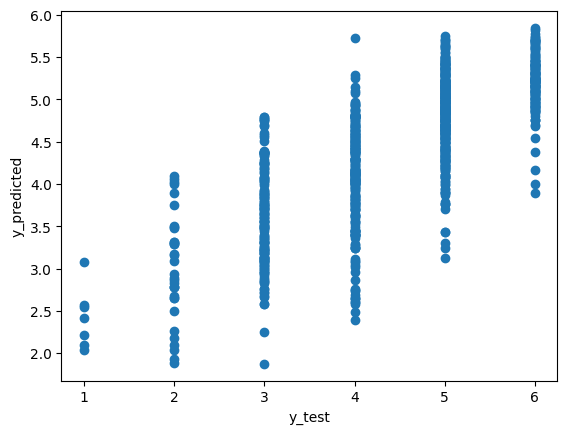

In [47]:
y_predict=lm.predict(x_test)
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.scatter(y_test,y_predict)

In [48]:
df.corr()

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
year,1.000000,0.038898,-0.004969,0.090248,0.044044,-0.091357,0.085676,-0.082626,0.110007,0.041735
month,0.038898,1.000000,0.013457,0.116979,0.239600,0.318244,-0.102448,0.100189,-0.219532,0.034934
day,-0.004969,0.013457,1.000000,-0.028085,-0.007882,0.021505,0.007108,-0.044876,0.015099,0.005593
tempavg,0.090248,0.116979,-0.028085,1.000000,0.863829,0.340977,-0.674395,0.704721,0.233133,0.070369
DPavg,0.044044,0.239600,-0.007882,0.863829,1.000000,0.731021,-0.758224,0.604098,0.213889,0.177919
humidity avg,-0.091357,0.318244,0.021505,0.340977,0.731021,1.000000,-0.574413,0.173502,0.101864,0.297830
SLPavg,0.085676,-0.102448,0.007108,-0.674395,-0.758224,-0.574413,1.000000,-0.557946,-0.378632,-0.242161
visibilityavg,-0.082626,0.100189,-0.044876,0.704721,0.604098,0.173502,-0.557946,1.000000,0.244426,-0.022533
windavg,0.110007,-0.219532,0.015099,0.233133,0.213889,0.101864,-0.378632,0.244426,1.000000,0.164852
Rainfall,0.041735,0.034934,0.005593,0.070369,0.177919,0.297830,-0.242161,-0.022533,0.164852,1.000000


<Axes: >

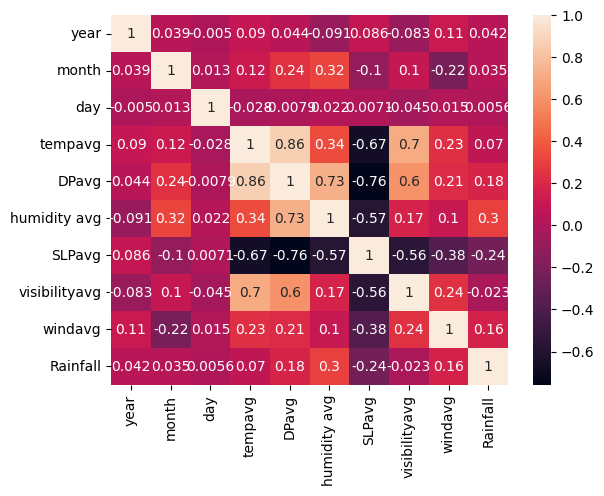

In [49]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [51]:
r2_score(y_test,y_predict)

0.5916127264796457

In [52]:
mean_squared_error(y_test,y_predict)

0.48645931374618034

In [53]:
mean_absolute_error(y_test,y_predict)

0.5514212210876498

In [54]:
lm.score(x_test,y_test)

0.5916127264796457

## Logistic_Regression

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,  random_state=2)

In [130]:
df.count()

year             2362
month            2362
day              2362
tempavg          2362
DPavg            2362
humidity avg     2362
SLPavg           2362
visibilityavg    2362
windavg          2362
Rainfall         2362
dtype: int64

In [123]:
print(x.shape, x_train.shape, x_test.shape)

(2362, 7) (118, 7) (2244, 7)


In [124]:
model = LogisticRegression()

In [125]:
# training the Logistic Regression Model with Training Data
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [127]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.559322033898305


In [128]:

X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [129]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.4790552584670232
